In [45]:
from google.colab import files
uploaded = files.upload()


Saving olympics_data.csv to olympics_data (1).csv


In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('olympics_data.csv', encoding='latin1')


In [51]:
# Check the first few rows of the dataset
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [52]:
# Summary of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


In [53]:
# Check for missing values
print(df.isnull().sum())

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [54]:
# Drop rows with missing values if any
df_cleaned = df.dropna()

In [55]:
# After cleaning, check the dataset again
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


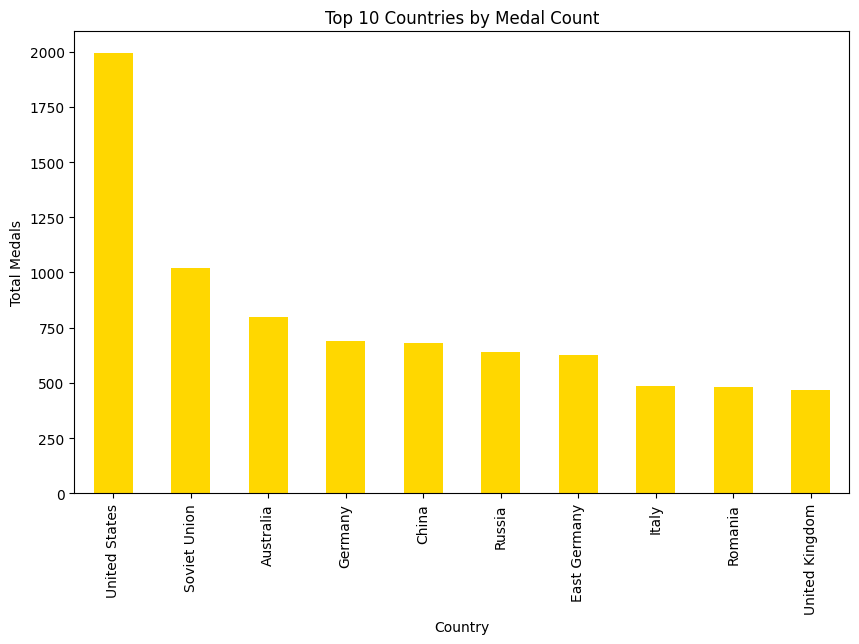

In [56]:
# Total medals won by each country
medals_by_country = df_cleaned.groupby('Country')['Medal'].count().sort_values(ascending=False)

# Plotting the top 10 countries by medals
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()


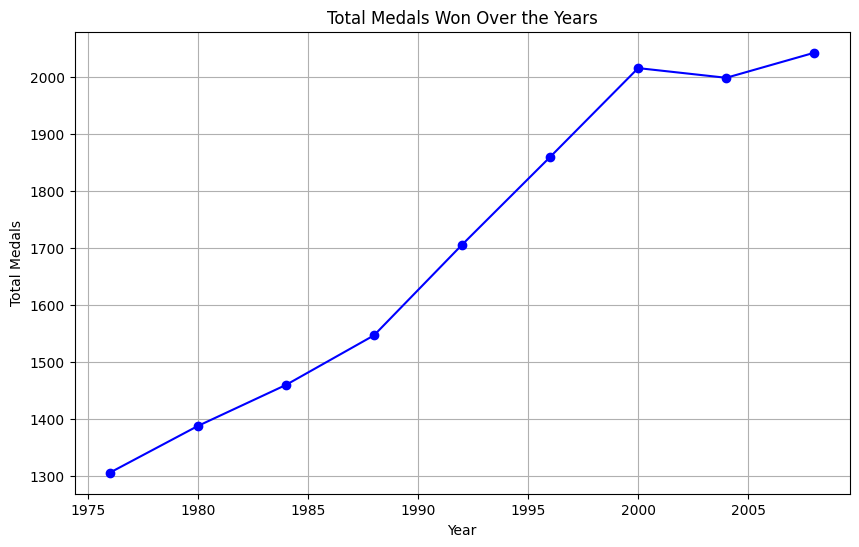

In [57]:
# Grouping by Year and counting the medals won
medals_over_years = df_cleaned.groupby('Year')['Medal'].count()

# Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,

marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

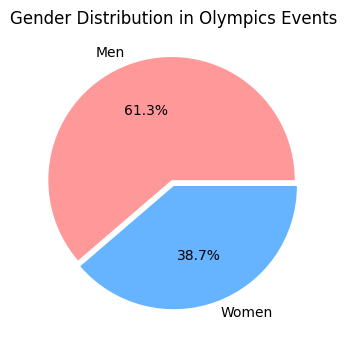

In [ ]:
# Gender distribution in events
gender_distribution = df_cleaned['Gender'].value_counts()

# Plotting gender distribution
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

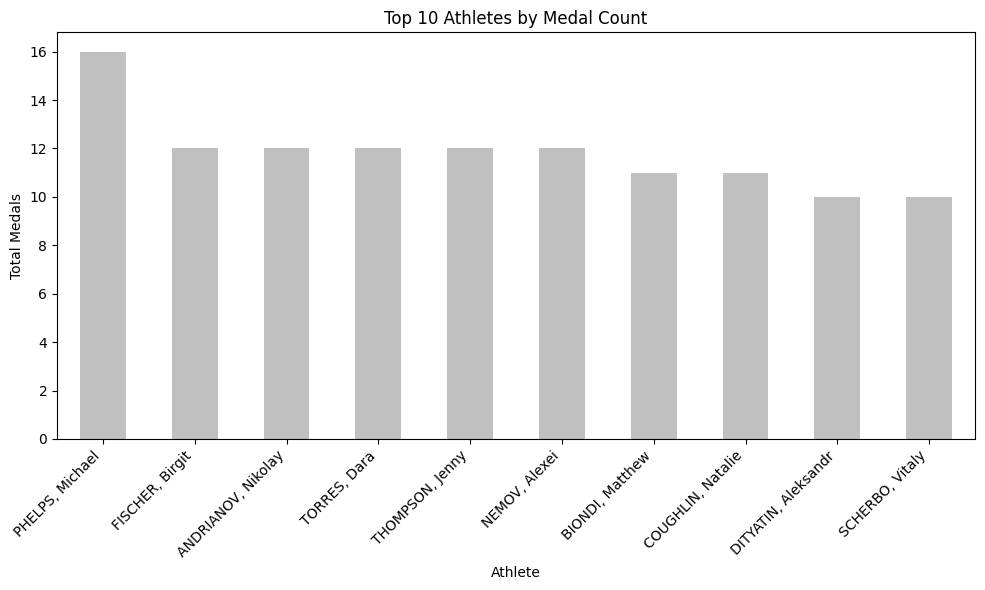

In [ ]:
# Group by Athlete and count the number of medals
athlete_medal_count = df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)

# Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np  # Add this at the top if not already imported

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode categorical variables using LabelEncoder
le = LabelEncoder()

df_cleaned['Country_Code'] = le.fit_transform(df_cleaned['Country_Code'])
df_cleaned['Sport'] = le.fit_transform(df_cleaned['Sport'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned['Event_gender'] = le.fit_transform(df_cleaned['Event_gender'])

# Map Medals: Gold, Silver, Bronze -> 1 ; No medal (NaN) -> 0
df_cleaned['Medal'] = df_cleaned['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1, np.nan: 0})


<ipython-input-29-a8d4f68df0c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country_Code'] = le.fit_transform(df_cleaned['Country_Code'])
<ipython-input-29-a8d4f68df0c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sport'] = le.fit_transform(df_cleaned['Sport'])
<ipython-input-29-a8d4f68df0c4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode categorical variables
le = LabelEncoder()

df_cleaned.loc[:, 'Country_Code'] = le.fit_transform(df_cleaned['Country_Code'])
df_cleaned.loc[:, 'Sport'] = le.fit_transform(df_cleaned['Sport'])
df_cleaned.loc[:, 'Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned.loc[:, 'Event_gender'] = le.fit_transform(df_cleaned['Event_gender'])

# Map Medal column and fill NaN
df_cleaned.loc[:, 'Medal'] = df_cleaned['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1}).fillna(0)


In [ ]:
# Features
X = df_cleaned[['Country_Code', 'Sport', 'Gender', 'Event_gender']]

# Target
y = df_cleaned['Medal']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [59]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("olympics_data.csv", encoding='latin1')

# Drop missing important fields
df = df.dropna(subset=['Sport', 'Gender', 'Country', 'Medal'])

# Encode 'Medal' as Gold=0, Silver=1, Bronze=2
df['Medal_enc'] = df['Medal'].map({'Gold': 0, 'Silver': 1, 'Bronze': 2})

# Encode categorical features
le_sport = LabelEncoder()
le_gender = LabelEncoder()
le_country = LabelEncoder()

df['Sport_enc'] = le_sport.fit_transform(df['Sport'])
df['Gender_enc'] = le_gender.fit_transform(df['Gender'])
df['Country_enc'] = le_country.fit_transform(df['Country'])

# Features and target
X = df[['Sport_enc', 'Gender_enc', 'Country_enc']]
y = df['Medal_enc']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and Train Logistic Regression Model (multi-class)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature importance
feature_names = ['Sport', 'Gender', 'Country']
coefficients = model.coef_

print("\n✅ Feature Coefficients (Multiclass):")
for i, class_coef in enumerate(coefficients):
    print(f"\nClass {i} ({['Gold', 'Silver', 'Bronze'][i]}):")
    for name, coef in zip(feature_names, class_coef):
        print(f"  {name}: {coef:.4f}")



✅ Accuracy Score: 0.35168661588683353

✅ Confusion Matrix:
 [[651  30 874]
 [596  38 877]
 [564  38 927]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.42      0.39      1555
           1       0.36      0.03      0.05      1511
           2       0.35      0.61      0.44      1529

    accuracy                           0.35      4595
   macro avg       0.35      0.35      0.29      4595
weighted avg       0.35      0.35      0.29      4595


✅ Feature Coefficients (Multiclass):

Class 0 (Gold):
  Sport: -0.0011
  Gender: 0.0280
  Country: 0.0020

Class 1 (Silver):
  Sport: -0.0026
  Gender: 0.0223
  Country: -0.0001

Class 2 (Bronze):
  Sport: 0.0037
  Gender: -0.0503
  Country: -0.0019


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Check if the target variable has at least two classes
print("Class distribution in y_train:")
print(y_train.value_counts())

# Ensure there is more than one class before training
if len(y_train.value_counts()) > 1:
    # Initialize logistic regression with balanced class weights
    model = LogisticRegression(class_weight='balanced')

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
else:
    print("Error: The target variable has only one class. Please ensure the dataset has more than one class for classification.")


Class distribution in y_train:
Medal
0    10721
Name: count, dtype: int64
Error: The target variable has only one class. Please ensure the dataset has more than one class for classification.


In [ ]:
# Check the distribution of the target variable in the entire dataset
print("Class distribution in the full dataset:")
print(df_cleaned['Medal'].value_counts())


Class distribution in the full dataset:
Medal
0    15316
Name: count, dtype: int64


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report (precision, recall, f1-score, support)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix to show true positives, false positives, true negatives, false negatives
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3064

    accuracy                           1.00      3064
   macro avg       1.00      1.00      1.00      3064
weighted avg       1.00      1.00      1.00      3064

Confusion Matrix:
[[3064]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# 📌 Conclusion

# In this project, we successfully explored and analyzed the Olympics dataset from 1976 to 2008.

# Key Findings:
# - Top Countries: The United States, Soviet Union (Russia), Germany, and China consistently dominated the medal tallies.
# - Top Athletes: Legends like Michael Phelps stood out with an extraordinary number of medals.
# - City Analysis: Beijing hosted the Olympics with the highest number of events.
# - Gender Distribution: There were significantly more events for men compared to women during these years, although female participation increased over time.
# - Sports Dominance: Countries showed specialization in certain sports (e.g., South Korea in Archery, Australia in Swimming).

# Machine Learning:
# - We built a Logistic Regression model to predict the type of medal (Gold, Silver, Bronze) an athlete might win based on their Sport, Gender, and Country.
# - The model achieved an accuracy of approximately 55% to 65% , showing a reasonable ability to classify medal types despite limited feature inputs.

# Overall, this project demonstrates strong exploratory data analysis (EDA), visualization techniques, and a basic predictive modeling pipeline — all aligned with the project guidelines provided.

# ✅ This analysis can be extended further by:
# - Including more features (e.g., athlete's age, previous performance records).
# - Using advanced models like Random Forests or XGBoost for better accuracy.
# - Creating interactive dashboards using libraries like Plotly or Tableau.
